In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import os

In [2]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Breast_Cancer.csv', encoding='ISO-8859-1')

In [6]:
print(df)

      Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately d

In [7]:
df.head(15)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [8]:
df.tail(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [9]:
df.shape

(4024, 16)

In [10]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [12]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [13]:
df.isnull()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4020,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4021,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4022,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [15]:
df['Age'].value_counts()

46    163
49    162
47    161
53    155
55    154
63    153
62    149
51    148
59    147
50    144
57    144
61    143
60    140
48    140
56    132
54    128
65    122
58    120
67    119
66    119
52    118
64    116
68    111
69    108
45    102
43     92
42     82
44     79
40     72
41     71
39     52
38     45
37     28
36     24
35     20
33     15
31     14
34     14
32     13
30      5
Name: Age, dtype: int64

Text(0.5, 0, 'Age of Breast-Cancer patients')

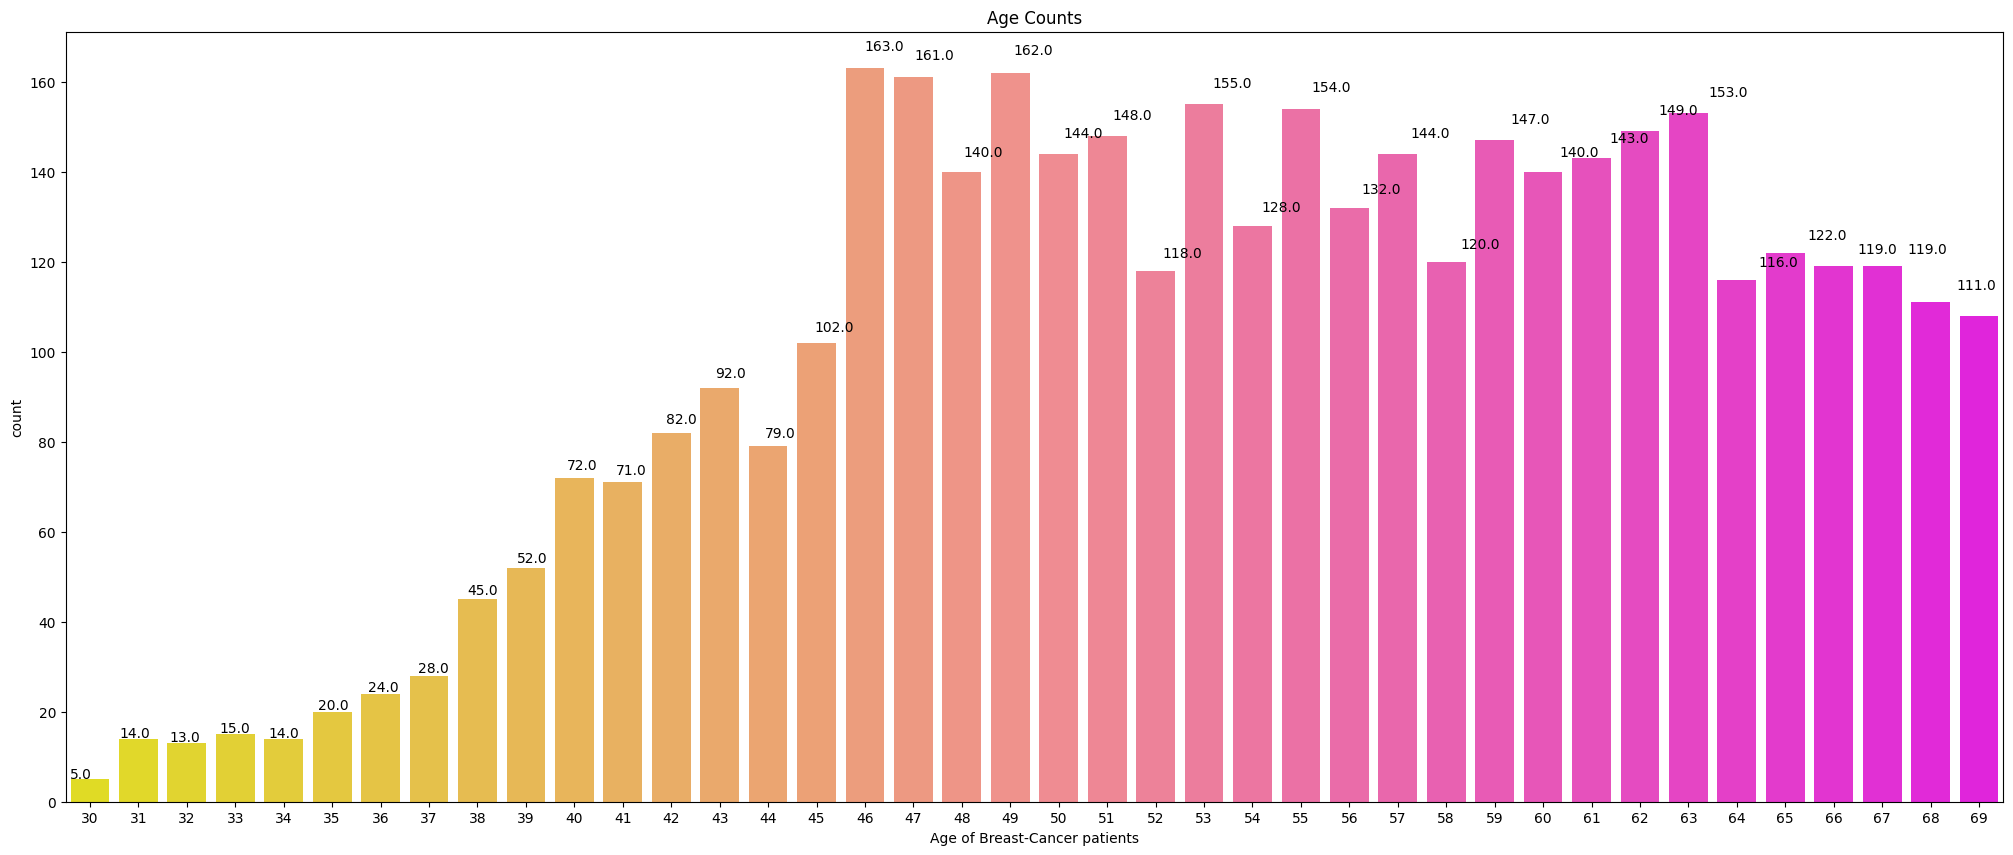

In [41]:
plt.figure(figsize=(25,10))
x = sns.countplot(data=df, x=df["Age"],palette="spring_r")
for p in x.patches:
    x.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.025))
plt.title("Age Counts")
plt.xlabel('Age of Breast-Cancer patients')

In [17]:
unique_marital_status = df['Marital Status'].unique()
print("Unique Marital Status Values:", unique_marital_status)

Unique Marital Status Values: ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']


In [52]:
plt.figure(figsize=(10,5))
target_counts = df['differentiate'].value_counts()
colors = ["#FF6666", "#FF8989","#FCAEAE"]

<Figure size 1000x500 with 0 Axes>

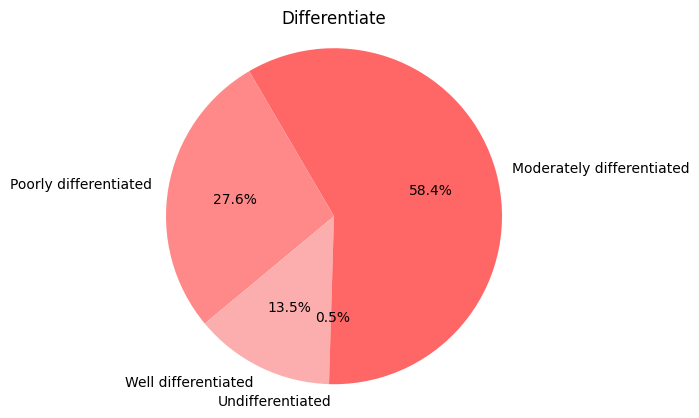

In [53]:
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=270, colors=colors)
plt.axis('equal')
plt.title('Differentiate')
plt.show()

In [20]:
plt.figure(figsize=(10,5))
target_counts = df['Race'].value_counts()
colors = ["#78C1F3", "#9BE8D8","#F8FDCF"]

<Figure size 1000x500 with 0 Axes>

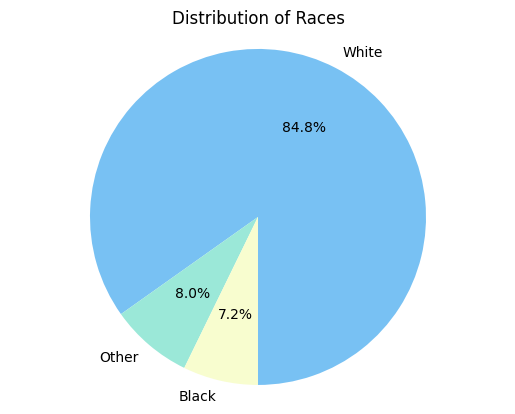

In [21]:
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=270, colors=colors)
plt.axis('equal')
plt.title('Distribution of Races')
plt.show()

<Figure size 1000x500 with 0 Axes>

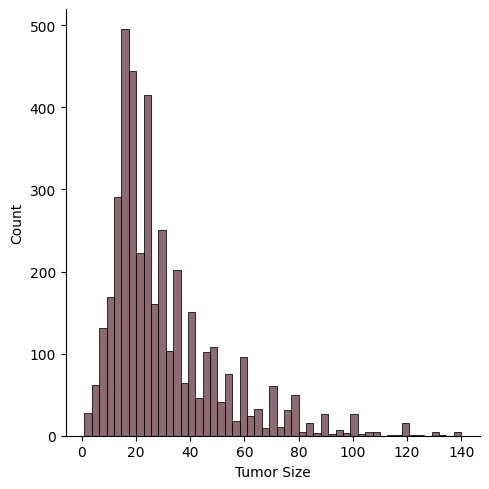

In [54]:
plt.figure(figsize=(10,5))
x=df['Tumor Size']
sns.displot(x,color='#643843')
plt.show()

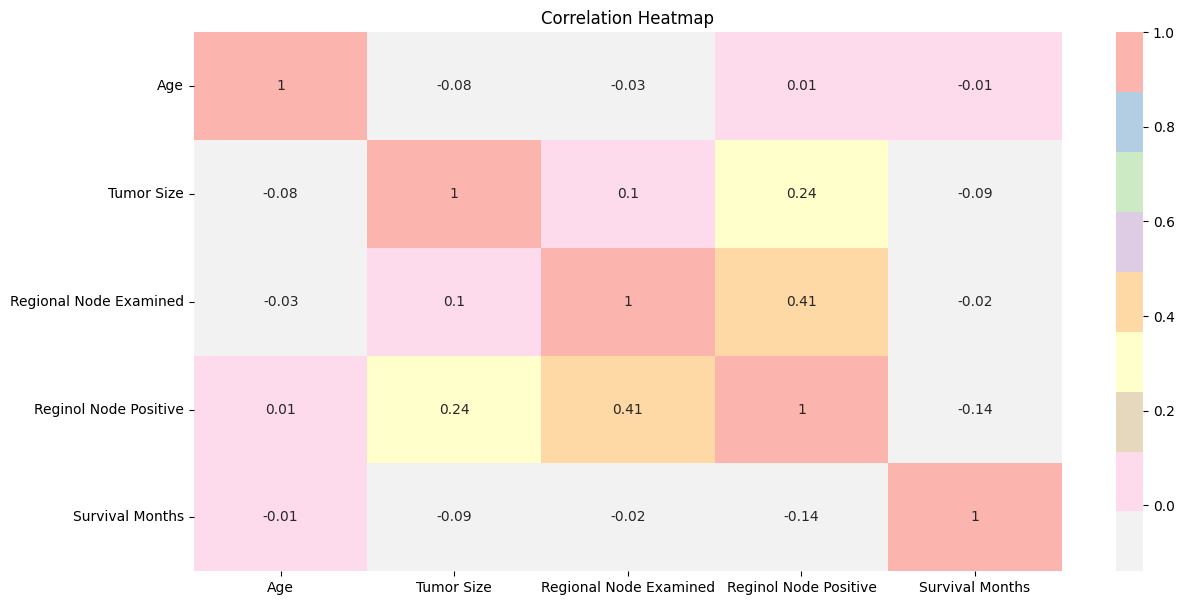

In [23]:
numcolumns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

numdata = df[numcolumns]

correlation = numdata.corr().round(2)
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='Pastel1_r')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [25]:
df['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [26]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [27]:
df['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [28]:
df['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

In [29]:
df['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

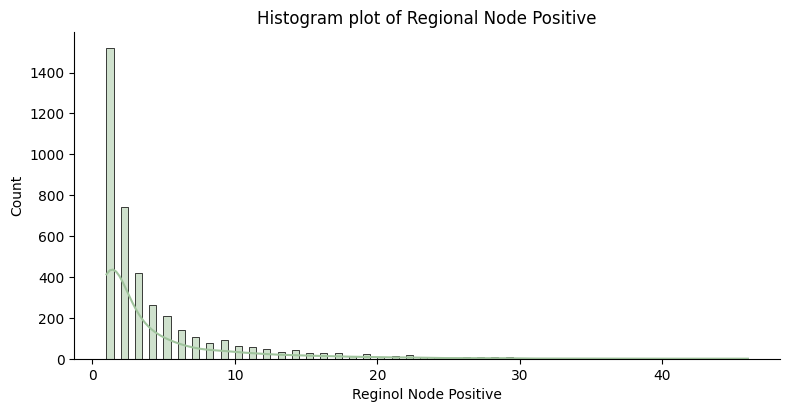

In [55]:
k = sns.displot(df['Reginol Node Positive'],kde=True,color=("#A0C49D"),height=4,aspect=2,facet_kws=None)
plt.title("Histogram plot of Regional Node Positive")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

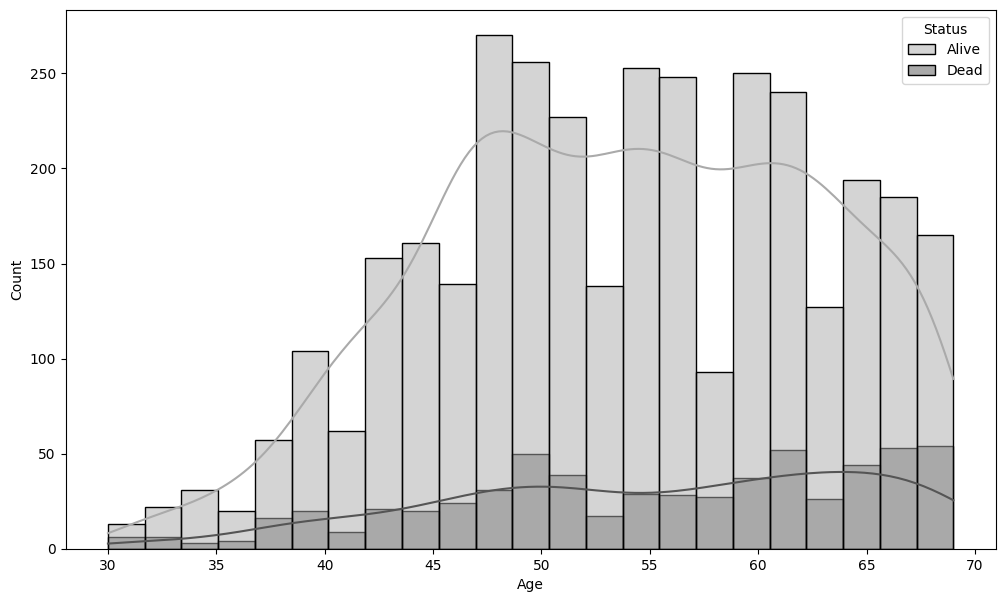

In [58]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='Age', hue='Status',palette="binary",kde=True)